##  This data is collected from https://archive.ics.uci.edu/ml/datasets/Algerian+Forest+Fires+Dataset++ 

* Data Set Information:

* The dataset includes 244 instances that regroup a data of two regions of Algeria,namely the Bejaia region located in the northeast of Algeria and the Sidi Bel-abbes region located in the northwest of Algeria.

* 122 instances for each region.

* The period from June 2012 to September 2012.
* The dataset includes 11 attribues and 1 output attribue (class)
* The 244 instances have been classified into fire (138 classes) and not fire (106 classes) classes.

# Attribute Information

1. Date : (DD/MM/YYYY) Day, month ('june' to 'september'), year (2012)
    
Weather data observations

2. Temp : temperature noon (temperature max) in Celsius degrees: 22 to 42
3. RH : Relative Humidity in %: 21 to 90
4. Ws :Wind speed in km/h: 6 to 29
5. Rain: total day in mm: 0 to 16.8
        
FWI Components

6. Fine Fuel Moisture Code (FFMC) index from the FWI system: 28.6 to 92.5
7. Duff Moisture Code (DMC) index from the FWI system: 1.1 to 65.9
8. Drought Code (DC) index from the FWI system: 7 to 220.4
9. Initial Spread Index (ISI) index from the FWI system: 0 to 18.5
10. Buildup Index (BUI) index from the FWI system: 1.1 to 68
11. Fire Weather Index (FWI) Index: 0 to 31.1
12. Region: two regions, 1 = Bejaia Region and 2 = Sidi-Bel Abbes Region
12. Update_Classes: two classes, namely 0 = not fire and 1 = fire

## 1. Import Data and Required Packages

In [1]:
import scipy.stats as stats 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
from six.moves import urllib

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
data = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header = 1)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
data

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire




Here the Missing values at 122th index seprate the data set in two regions.

1 : Bejaia Region Dataset

2 : Sidi-Bel Abbes Region Dataset

Therefore, we can drop rows with missing values & make a new column based on the Region


In [3]:
df=data.drop([data.index[122],data.index[123]]).reset_index(drop=True)

In [4]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire


In [5]:
df.loc[:121,"Region"]=1
df.loc[122:243,"Region"]=2
df[['Region']] = df[['Region']].astype(int)

#### Show Top 10 records

In [6]:
df.head(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1


#### Show bottom 10 records

In [7]:
df.tail(10)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
234,21,09,2012,35,34,17,0,92.2,23.6,97.3,13.8,29.4,21.6,fire,2
235,22,09,2012,33,64,13,0,88.9,26.1,106.3,7.1,32.4,13.7,fire,2
236,23,09,2012,35,56,14,0,89,29.4,115.6,7.5,36,15.2,fire,2
237,24,09,2012,26,49,6,2,61.3,11.9,28.1,0.6,11.9,0.4,not fire,2
238,25,09,2012,28,70,15,0,79.9,13.8,36.1,2.4,14.1,3,not fire,2
239,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,2
240,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,2
241,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,2
242,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,2
243,30,09,2012,24,64,15,0.2,67.3,3.8,16.5,1.2,4.8,0.5,not fire,2


In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  ', 'Region'],
      dtype='object')

#### Creating new column indexing fire as 1 & not fire as 0

In [9]:
def fire (a):
    if a == "not fire   ":
        return 0
    else:
        return 1

In [10]:
df ['Update_Classes'] = df ['Classes  '].apply(fire)

In [11]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region,Update_Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,1,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,1,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,1,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,1,0
5,06,06,2012,31,67,14,0,82.6,5.8,22.2,3.1,7,2.5,fire,1,1
6,07,06,2012,33,54,13,0,88.2,9.9,30.5,6.4,10.9,7.2,fire,1,1
7,08,06,2012,30,73,15,0,86.6,12.1,38.3,5.6,13.5,7.1,fire,1,1
8,09,06,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,1,0
9,10,06,2012,28,79,12,0,73.2,9.5,46.3,1.3,12.6,0.9,not fire,1,0


Dropping Duplicate columns

In [12]:
df.drop(['Classes  '],axis=1,inplace=True)

Show Top 5 Records

In [13]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,1,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,1,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,1,0


Shape of the dataset

In [14]:
df.shape

(244, 15)

Check Datatypes in the dataset

In [15]:
df.info()
#Check null & Dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   day             244 non-null    object
 1   month           244 non-null    object
 2   year            244 non-null    object
 3   Temperature     244 non-null    object
 4    RH             244 non-null    object
 5    Ws             244 non-null    object
 6   Rain            244 non-null    object
 7   FFMC            244 non-null    object
 8   DMC             244 non-null    object
 9   DC              244 non-null    object
 10  ISI             244 non-null    object
 11  BUI             244 non-null    object
 12  FWI             244 non-null    object
 13  Region          244 non-null    int32 
 14  Update_Classes  244 non-null    int64 
dtypes: int32(1), int64(1), object(13)
memory usage: 27.8+ KB


In [16]:
#converting Dtypes for analysis


df[['Temperature',' RH', ' Ws']] = df[['Temperature',' RH', ' Ws']].astype(int)


df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI' , 'BUI' , 'FWI']] = df[['Rain ', 'FFMC', 'DMC', 'DC', 'ISI' , 'BUI' , 'FWI']].astype(float)

In [17]:
#new dTypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   day             244 non-null    object 
 1   month           244 non-null    object 
 2   year            244 non-null    object 
 3   Temperature     244 non-null    int32  
 4    RH             244 non-null    int32  
 5    Ws             244 non-null    int32  
 6   Rain            244 non-null    float64
 7   FFMC            244 non-null    float64
 8   DMC             244 non-null    float64
 9   DC              244 non-null    float64
 10  ISI             244 non-null    float64
 11  BUI             244 non-null    float64
 12  FWI             244 non-null    float64
 13  Region          244 non-null    int32  
 14  Update_Classes  244 non-null    int64  
dtypes: float64(7), int32(4), int64(1), object(3)
memory usage: 24.9+ KB


Summary of the Dataset

In [18]:
df.describe(include='all')
#display summary statistics for a dataframe

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
count,244,244,244,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
unique,31,4,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,01,07,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,8,62,244,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,1.500000,0.586066
std,NaN,NaN,NaN,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.501028,0.493549
min,NaN,NaN,NaN,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,1.000000,0.000000
25%,NaN,NaN,NaN,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,1.000000,0.000000
50%,NaN,NaN,NaN,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.500000,1.000000
75%,NaN,NaN,NaN,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,2.000000,1.000000


In [19]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,244.0,32.172131,3.633843,22.0,30.000,32.00,35.000,42.0
RH,244.0,61.938525,14.884200,21.0,52.000,63.00,73.250,90.0
Ws,244.0,15.504098,2.810178,6.0,14.000,15.00,17.000,29.0
Rain,244.0,0.760656,1.999406,0.0,0.000,0.00,0.500,16.8
FFMC,244.0,77.887705,14.337571,28.6,72.075,83.50,88.300,96.0
DMC,244.0,14.673361,12.368039,0.7,5.800,11.30,20.750,65.9
DC,244.0,49.288115,47.619662,6.9,13.275,33.10,68.150,220.4
ISI,244.0,4.759836,4.154628,0.0,1.400,3.50,7.300,19.0
BUI,244.0,16.673361,14.201648,1.1,6.000,12.45,22.525,68.0
FWI,244.0,7.049180,7.428366,0.0,0.700,4.45,11.375,31.1


### Checking Null Values

In [20]:
df.isnull().sum()

day               0
month             0
year              0
Temperature       0
 RH               0
 Ws               0
Rain              0
FFMC              0
DMC               0
DC                0
ISI               0
BUI               0
FWI               0
Region            0
Update_Classes    0
dtype: int64

### Checking Duplicate values

In [21]:
df.duplicated().sum()

0

### Unique values for each column

In [22]:
df.nunique()

day                31
month               4
year                1
Temperature        19
 RH                62
 Ws                18
Rain               39
FFMC              173
DMC               166
DC                198
ISI               106
BUI               173
FWI               126
Region              2
Update_Classes      2
dtype: int64

## 2. Exploring Data

In [23]:
#define numerical and catgorical columns
numeric_features = [i for i in df.columns if df[i].dtype != 'O']
categorical_features = [i for i in df.columns if df[i].dtype == 'O']

#print  columns
print ('We have {} numerical features: {}'.format(len(numeric_features),numeric_features))
print ('We have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 12 numerical features: ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Region', 'Update_Classes']
We have 3 categorical features: ['day', 'month', 'year']


In [24]:
df_num = df[numeric_features]
df_num.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [25]:
df_cat = df[categorical_features]
df_cat.head()

,day,month,year
0,01,06,2012
1,02,06,2012
2,03,06,2012
3,04,06,2012
4,05,06,2012


In [26]:
stats.normaltest(df_num['Temperature'])[1]*100

41.05451122516682

Data is normally distributed as p>0.05

<AxesSubplot:>

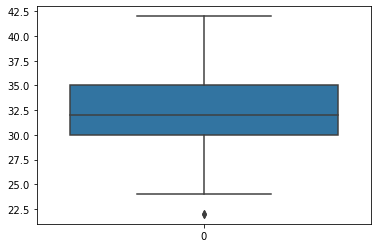

In [27]:
#outlier 
sns.boxplot(data=df_num['Temperature'])

<AxesSubplot:>

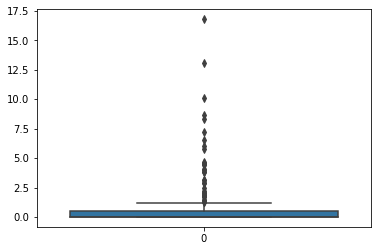

In [28]:
sns.boxplot(data=df_num['Rain '])

In [29]:
q1 = df['Rain '].quantile(0.25)
q3 = df['Rain '].quantile(0.75)
IQR = q3-q1
upper_fence = q3+(1.5*IQR)
lower_fence = q1-(1.5*IQR)

In [30]:
lower_fence

-0.75

In [31]:
upper_fence

1.25

In [32]:
df[df['Rain ']>upper_fence]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
14,15,06,2012,28,80,17,3.1,49.4,3.0,7.4,0.4,3.0,0.1,1,0
38,09,07,2012,32,68,14,1.4,66.6,7.7,9.2,1.1,7.4,0.6,1,0
91,31,08,2012,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,1,1
92,01,09,2012,25,76,17,7.2,46.0,1.3,7.5,0.2,1.8,0.1,1,1
93,02,09,2012,22,86,15,10.1,30.5,0.7,7.0,0.0,1.1,0.0,1,1
94,03,09,2012,25,78,15,3.8,42.6,1.2,7.5,0.1,1.7,0.0,1,0
101,10,09,2012,33,73,12,1.8,59.9,2.2,8.9,0.7,2.7,0.3,1,0


In [33]:
df.cov()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
Temperature,13.204817,-35.396782,-2.840215,-2.374270,35.297598,21.712423,64.111931,9.148506,23.553987,15.300965,0.497942,0.820515
RH,-35.396782,221.539415,9.874739,6.635431,-137.785533,-74.580245,-156.165754,-42.561327,-73.916459,-64.178446,-3.030864,-3.058473
Ws,-2.840215,9.874739,7.897102,0.956129,-6.577727,-0.043306,10.203135,0.142964,1.209369,0.708851,-0.248971,-0.070313
Rain,-2.374270,6.635431,0.956129,3.997623,-15.595918,-7.135415,-28.258988,-2.889611,-8.501670,-4.823366,-0.041152,-0.244337
FFMC,35.297598,-137.785533,-6.577727,-15.595918,205.565939,106.820535,344.044709,44.124525,120.185186,73.640607,1.613992,5.017523
DMC,21.712423,-74.580245,-0.043306,-7.135415,106.820535,152.968382,515.552604,34.856991,172.521016,80.407612,1.184156,3.395924
DC,64.111931,-156.165754,10.203135,-28.258988,344.044709,515.552604,2267.632245,99.696270,636.831657,260.718118,-1.944239,11.179011
ISI,9.148506,-42.561327,0.142964,-2.889611,44.124525,34.856991,99.696270,17.260932,37.841354,28.467868,0.554321,1.438450
BUI,23.553987,-73.916459,1.209369,-8.501670,120.185186,172.521016,636.831657,37.841354,201.686818,90.399916,0.626132,3.893454
FWI,15.300965,-64.178446,0.708851,-4.823366,73.640607,80.407612,260.718118,28.467868,90.399916,55.180617,0.738683,2.522087


In [34]:
df.skew()

day               0.002806
month             0.000000
year              0.000000
Temperature      -0.196309
 RH              -0.237964
 Ws               0.545881
Rain              4.579071
FFMC             -1.325633
DMC               1.527652
DC                1.479042
ISI               1.126950
BUI               1.458466
FWI               1.143243
Region            0.000000
Update_Classes   -0.351644
dtype: float64

## 3. Univariate Analysis

    The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.



### Numerical Features

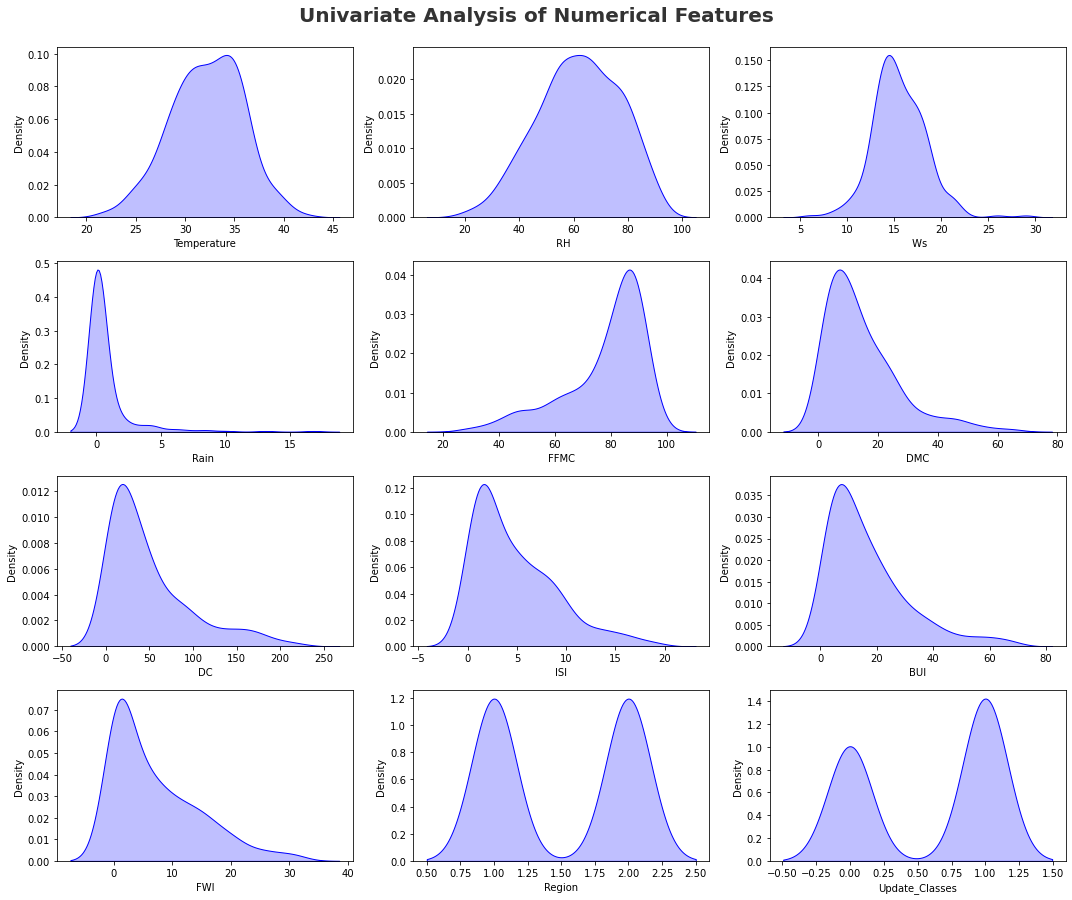

In [35]:
plt.figure(figsize=(15, 15))
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=20, fontweight='bold', alpha=0.8, y=1.)

for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=df[numeric_features[i]],shade=True, color='b')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

** Report **
* Outliers in Rainfall. Rain is right skewed and positively skewed


## 4. Multivariate Analysis

* Multivariate analysis is the analysis of more than one variable.

### Check Multicollinearity in Numerical features

In [36]:
df[(list(df.columns)[1:])].corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region,Update_Classes
Temperature,1.000000,-0.654443,-0.278132,-0.326786,0.677491,0.483105,0.370498,0.605971,0.456415,0.566839,0.273496,0.457499
RH,-0.654443,1.000000,0.236084,0.222968,-0.645658,-0.405133,-0.220330,-0.688268,-0.349685,-0.580457,-0.406424,-0.416340
Ws,-0.278132,0.236084,1.000000,0.170169,-0.163255,-0.001246,0.076245,0.012245,0.030303,0.033957,-0.176829,-0.050696
Rain,-0.326786,0.222968,0.170169,1.000000,-0.544045,-0.288548,-0.296804,-0.347862,-0.299409,-0.324755,-0.041080,-0.247604
FFMC,0.677491,-0.645658,-0.163255,-0.544045,1.000000,0.602391,0.503910,0.740751,0.590251,0.691430,0.224680,0.709060
DMC,0.483105,-0.405133,-0.001246,-0.288548,0.602391,1.000000,0.875358,0.678355,0.982206,0.875191,0.191094,0.556322
DC,0.370498,-0.220330,0.076245,-0.296804,0.503910,0.875358,1.000000,0.503919,0.941672,0.737041,-0.081489,0.475649
ISI,0.605971,-0.688268,0.012245,-0.347862,0.740751,0.678355,0.503919,1.000000,0.641351,0.922422,0.266298,0.701507
BUI,0.456415,-0.349685,0.030303,-0.299409,0.590251,0.982206,0.941672,0.641351,1.000000,0.856912,0.087996,0.555476
FWI,0.566839,-0.580457,0.033957,-0.324755,0.691430,0.875191,0.737041,0.922422,0.856912,1.000000,0.198474,0.687917


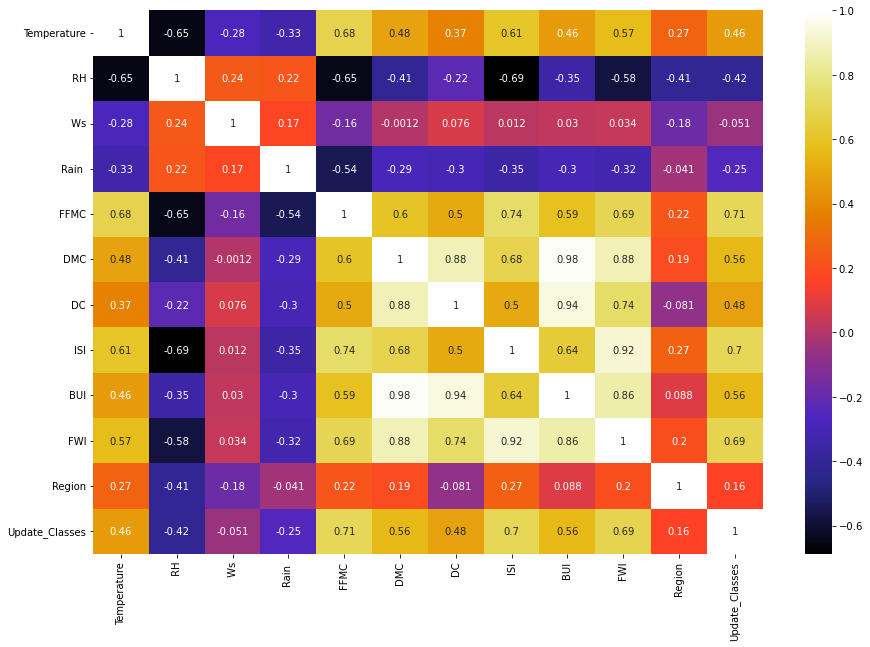

In [37]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(), cmap="CMRmap", annot=True)
plt.show()

In [44]:
continuous_features = [feature for feature in numeric_features if len(df[feature].unique())>=10]
print ("name of continuous features",continuous_features)

name of continuous features ['Temperature', ' RH', ' Ws', 'Rain ', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']


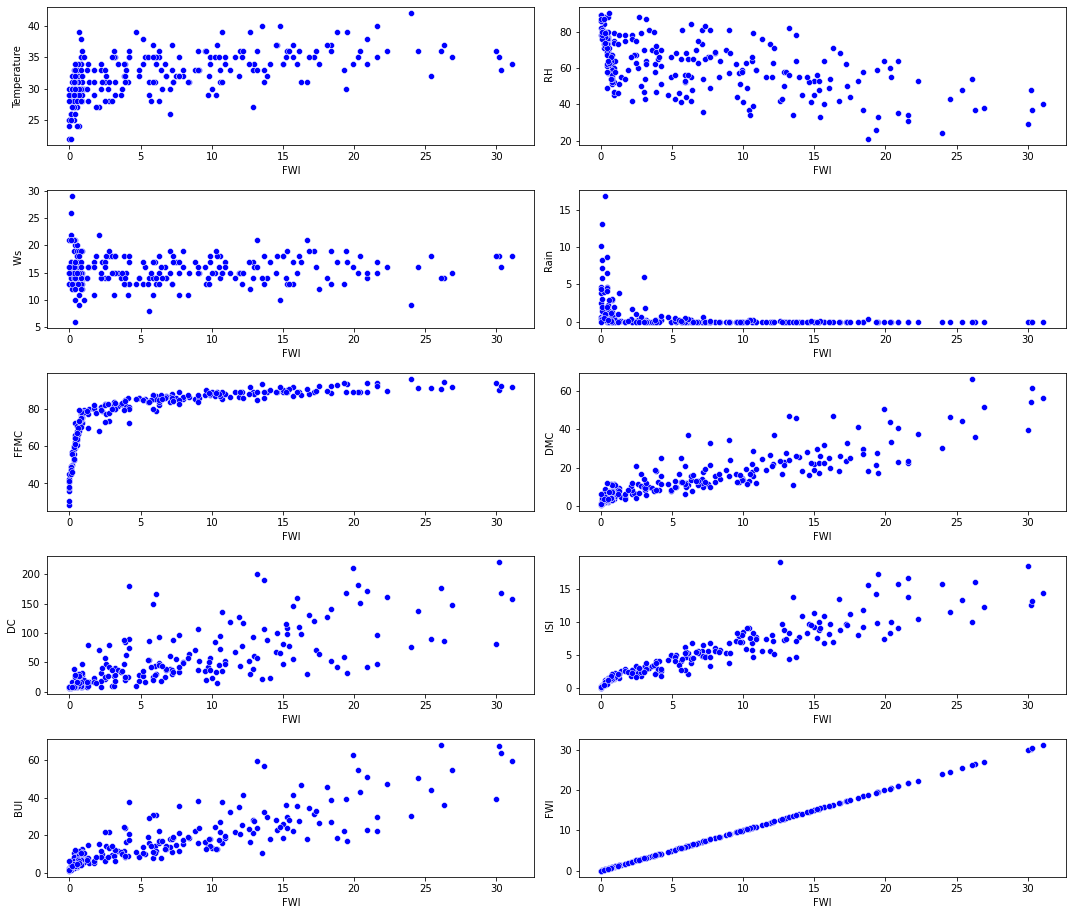

In [45]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='FWI', y=continuous_features[i], color='b')
    plt.tight_layout()

## Initial Analysis Report

**Report**
* **ISI & BUI has positive effect on FWI**
* **RH & Rain has negative effect on FWI,majority of the FWI indicates rain below 4 mm**
* **FWI significantly drops with FFMC below 80**

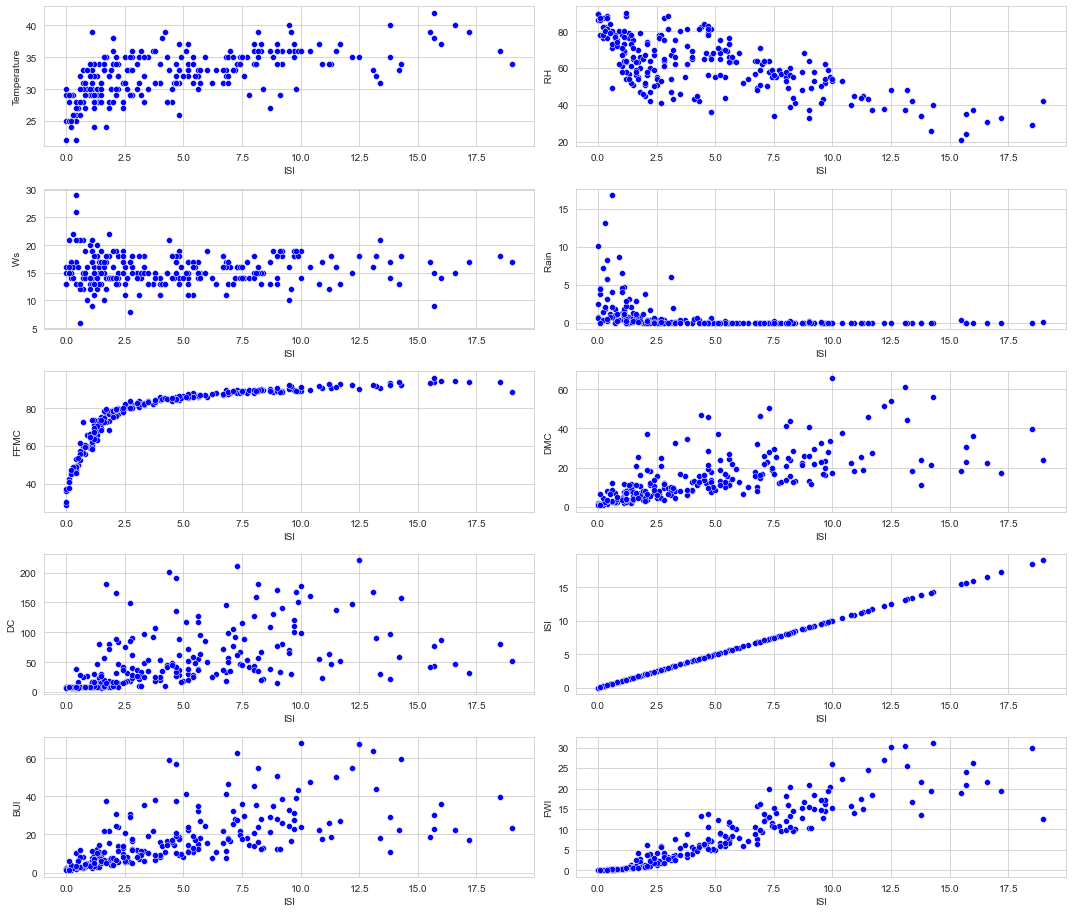

In [57]:
fig = plt.figure(figsize=(15, 20))

for i in range(0, len(continues_features)):
    ax = plt.subplot(8, 2, i+1)

    sns.scatterplot(data= df ,x='ISI', y=continuous_features[i], color='b')
    plt.tight_layout()

## Initial Analysis Report

**Report**
* **Temperature, Ws, FFMC & FWI has positive effect on Initial Spread Index**
* **Steep increase in ISI with FFMC above 80**

## 5. Visualization

### Visualize the Target Feature

Text(0.5, 1.0, 'Class Distributions \n 0: No Fire || 1: Fire')

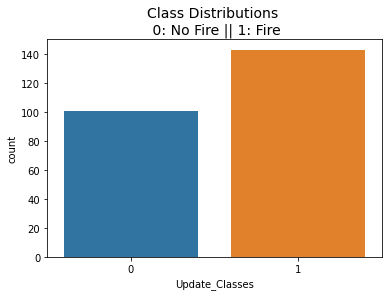

In [46]:
sns.countplot('Update_Classes', data=df, palette="tab10")
plt.title('Class Distributions \n 0: No Fire || 1: Fire', fontsize=14)

### Monthwise Fire Analysis

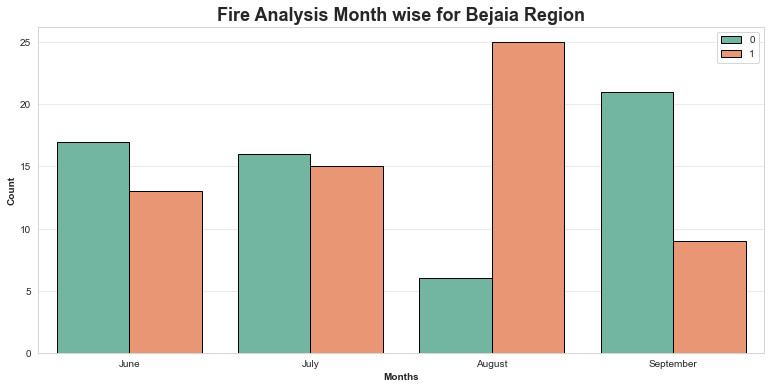

In [52]:
dftemp= df.loc[df['Region']== 1]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Update_Classes',data= dftemp,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Bejaia Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()



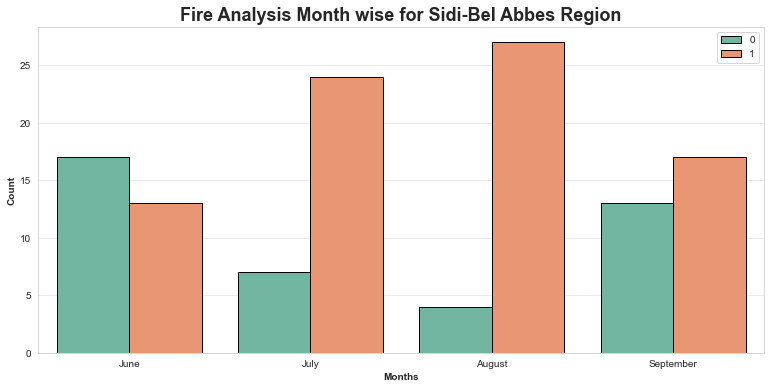

In [53]:
dftemp1= df.loc[df['Region']== 2]
plt.subplots(figsize=(13,6))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Update_Classes',data= dftemp1,ec = 'black', palette= 'Set2')
plt.title('Fire Analysis Month wise for Sidi-Bel Abbes Region', fontsize=18, weight='bold')
plt.ylabel('Count', weight = 'bold')
plt.xlabel('Months', weight= 'bold')
plt.legend(loc='upper right')
plt.xticks(np.arange(4), ['June','July', 'August', 'September',])
plt.grid(alpha = 0.5,axis = 'y')
plt.show()



**Report**
* **Highest number of fire occurances are observed in the month of August for both Bejaia & Sidi-Bel Abbes region**